In [38]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import time 
import matplotlib.pyplot as plt

In [84]:
# to plot IRIS dataset, see https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py

In [86]:
# Load the iris data from imported module into panda dataframe, assign Variety name to the column
X_features = pd.DataFrame(data=load_iris().data, columns=load_iris().feature_names)
Y_labels = pd.DataFrame(data=load_iris().target, columns=['Variety'])

# Map numerical numbers 0,1 and 2 to categorical labels using target_names
mapping = dict(enumerate(load_iris().target_names))

# Use the mapping to replace 0,1,2 with the corresponding flower names
Y_labels["Variety"] = Y_labels["Variety"].replace(mapping)

#Look at top 5 entries in the DF, check for the size, names to sanitize
print("No of rows, columns in IRIS Input table:", X_features.shape)
print("No of rows, columns in IRIS Output table:", Y_labels.shape)
X_features.head()

No of rows, columns in IRIS Input table: (150, 4)
No of rows, columns in IRIS Output table: (150, 1)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
##IRIS data in python sklearn module excludes the output label values i.e. flower names, whereas the latter does not.
##Load the iris data from the local file into panda dataframe
#iris_data = pd.read_csv('iris_flower_dataset.csv')  
#print("No of rows, columns in IRIS dataframe:", iris_data.shape)
###check for the row and/or column names in the dataframe
#iris_data.head()
##For local copy, Split the data into expected input (features) and output (labels) while dropping 2 columns from input 
#X_features = iris_data.drop(columns=['Id','variety'])
#Y_labels = iris_data['variety']

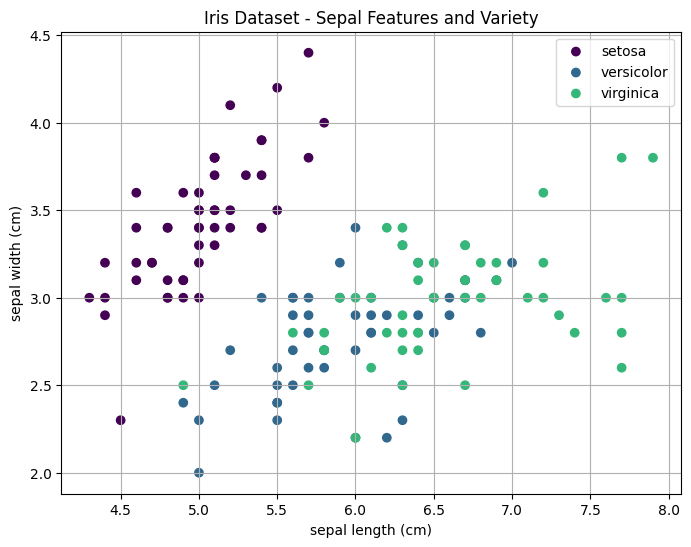

In [92]:
# Let's visualize the data first 

# Select first 2 features (2d graph is limited, remember) for plotting IRIS variety 
data_to_plot = X_features.iloc[:, :2]  # Select first two columns

# Create scatter plot in 6x8 graph
plt.figure(figsize=(8, 6))
unique_variety_names = Y_labels["Variety"].unique()  # Get unique variety names

# Plot each datapoint pair (first 2 features) by iterating over 3 varieties of flowers 
for i, name in enumerate(unique_variety_names):
    data_subset = data_to_plot[Y_labels["Variety"] == name]
    colormap = plt.cm.plasma  # assign a colormap option
    color = colormap(float(i) / len(unique_variety_names))  # Normalize index and get color
    plt.scatter(data_subset.iloc[:, 0], data_subset.iloc[:, 1], label=name, c=[color] * len(data_subset))  # Use normalized color

# Labels and title
plt.xlabel(X_features.columns[0])
plt.ylabel(X_features.columns[1])
plt.title("Iris Dataset - Sepal Features and Variety")
plt.legend()
plt.grid(True)
plt.show()

In [106]:
#Split the data set in training set and test set with 80:20 mix and do so randomly  
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y_labels, test_size=0.2, random_state=40)

In [94]:
#Normalize the features values in training and test dataset for equal feature weightage  
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [95]:
#Choose an algorithm to create an ML model with default parameters
model1 = LogisticRegression()

In [99]:
#train the model 
Y_train_flat = Y_train.values.flatten()
t0 = time.time()
model1.fit(X_train_scaled, Y_train_flat)
print("Training time (seconds):", time.time()-t0)

Training time (seconds): 0.00782918930053711


In [100]:
#Evaluate the accuracy of a model1 using the test data
Y_predicted = model1.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, Y_predicted)
print("Accuracy", accuracy)

Accuracy 0.9666666666666667


In [103]:
#Use the model for predicting output using new data
new_data = np.array([[5.1,3.5,1.4,0.2],
                     [6.3,4.2,2.5,1.9],
                     [1.5,10.1,0.3,0.2]])
print(model1.predict(new_data))

['versicolor' 'virginica' 'setosa']
